# Image Mulitclass Classification in TensorFlow: Rock - Paper - Scissors

**Goal:** A Neural Net that recogizes if a hand is showing a rock, paper, or scissor gesture!

Stretch Goal: implement in camera feed with OpenCV.

**Sources:**

https://www.tensorflow.org/datasets/catalog/rock_paper_scissors

http://www.laurencemoroney.com/rock-paper-scissors-dataset/

## Step 1: Download, unpack, and check number of files

In [1]:
import wget

print('Start training set download')
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip'
wget.download(url)
print('Finished download')

print('Start validation set download')
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip'
wget.download(url)
print('Finished download')

Start training set download
Finished download
Start validation set download
Finished download


In [2]:
import os
import zipfile

# get the current working directory where the zip is stored
cwd = os.getcwd()

with zipfile.ZipFile("rps.zip","r") as zip_ref:
    zip_ref.extractall(cwd)

with zipfile.ZipFile("rps-test-set.zip","r") as zip_ref:
    zip_ref.extractall(cwd)

In [3]:
# establish directory to the three training image folders
rock_dir = os.path.join(cwd, 'rps\\rock')
paper_dir = os.path.join(cwd,'rps\\paper')
scissors_dir = os.path.join(cwd,'rps\\scissors')

# number of files per folder
print('Total training rock images:', len(os.listdir(rock_dir)))
print('Total training paper images:', len(os.listdir(paper_dir)))
print('Total training scissors images:', len(os.listdir(scissors_dir)))


# show names of images in each folder
show = 5

rock_files = os.listdir(rock_dir)
print('The names of the first {} rock files are: '.format(show),rock_files[:show])

paper_files = os.listdir(paper_dir)
print('The names of the first {} paper files are: '.format(show),paper_files[:show])

scissors_files = os.listdir(scissors_dir)
print('The names of the first {} scissor files are: '.format(show),scissors_files[:show])

Total training rock images: 840
Total training paper images: 840
Total training scissors images: 840
The names of the first 5 rock files are:  ['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png']
The names of the first 5 paper files are:  ['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png']
The names of the first 5 scissor files are:  ['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png']


## Step 2: Show images from training set

C:\Users\ChristianV700\Desktop\rps\rock\rock01-000.png


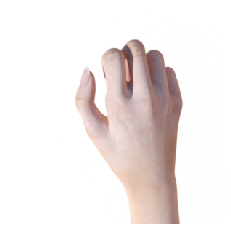

C:\Users\ChristianV700\Desktop\rps\rock\rock01-001.png


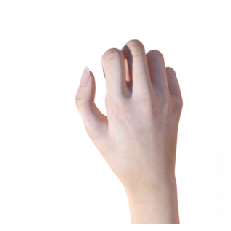

C:\Users\ChristianV700\Desktop\rps\paper\paper01-000.png


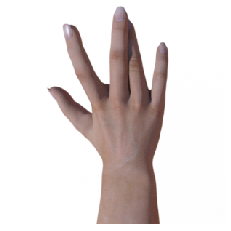

C:\Users\ChristianV700\Desktop\rps\paper\paper01-001.png


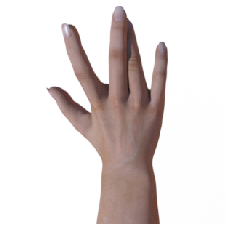

C:\Users\ChristianV700\Desktop\rps\scissors\scissors01-000.png


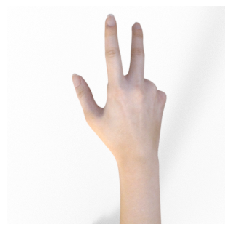

C:\Users\ChristianV700\Desktop\rps\scissors\scissors01-001.png


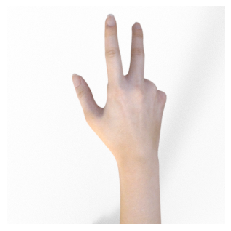

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# number of images to draw per folder
pic_index = 2

# get paths of images
next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

rock_files[0]

# use paths to draw images with matplotlib
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
from PIL import Image

imgpath = os.path.join(rock_dir,'rock01-000.png')
img = Image.open(imgpath)
width, height = img.size
print('Image width: {}, image height: {}'.format(width,height))

Image width: 300, image height: 300


## Step 3: Image preprocessing

- color
- rotation
- zoom
- resizing

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = os.path.join(cwd, 'rps\\')
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = os.path.join(cwd, 'rps-test-set\\')
validation_datagen = ImageDataGenerator(
    rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Step 4: Tensorflow/Keras Deep Learning model design

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Output with softmax
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
____

## Step 5: Choose gradient descent type Run, and Save model

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 20s 250ms/step - loss: 1.1755 - acc: 0.3516 - val_loss: 1.0593 - val_acc: 0.5645
Epoch 2/25
79/79 [==============================] - 15s 192ms/step - loss: 0.9058 - acc: 0.5563 - val_loss: 0.5519 - val_acc: 0.7097
Epoch 3/25
79/79 [==============================] - 14s 183ms/step - loss: 0.5565 - acc: 0.7806 - val_loss: 0.6277 - val_acc: 0.6801
Epoch 4/25
79/79 [==============================] - 14s 179ms/step - loss: 0.3574 - acc: 0.8544 - val_loss: 0.7968 - val_acc: 0.6613
Epoch 5/25
79/79 [==============================] - 14s 178ms/step - loss: 0.2905 - acc: 0.8905 - val_loss: 0.0547 - val_acc: 0.9812
Epoch 6/25
79/79 [==============================] - 14s 180ms/step - loss: 0.2270 - acc: 0.9155 - val_loss: 0.0405 - val_acc: 0.9785
Epoch 7/25
79/79 [==============================] - 15s 193ms/step - loss: 0.1810 - acc: 0.9389 - val_loss: 0.0404 - val_acc: 0.9731
Epoch 8/25
79/79 [==============================] - 17s 216ms/step - 

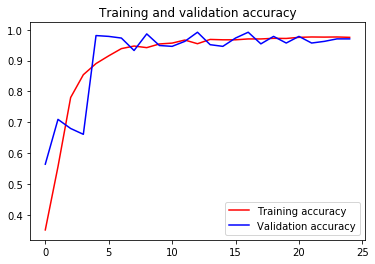

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Step 6: Make predictions with the trained model

Fill hand images in a self-created'pred' folder, then run preprocessing, and make prediction. Note: the output array classes are in alphabetical order:
- [[1,0,0]] = paper,

- [[0,1,0]] = rock,

- [[0,0,1]] = scissors.

Using TensorFlow backend.


The prediction for C:\Users\ChristianV700\Desktop\pred\testpaper04-07.png is [[1. 0. 0.]], paper.


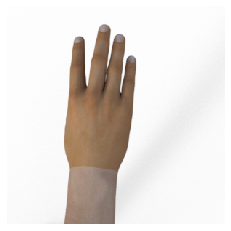

The prediction for C:\Users\ChristianV700\Desktop\pred\testrock03-13.png is [[0. 1. 0.]], rock.


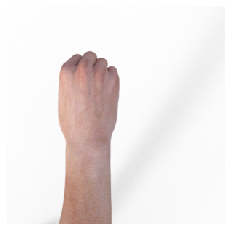

The prediction for C:\Users\ChristianV700\Desktop\pred\testscissors02-27.png is [[0. 0. 1.]], scissors.


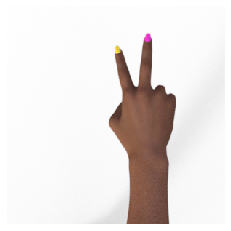

In [10]:
import numpy as np
from keras.preprocessing import image

# get all prediction file paths
pred_dir = os.path.join(cwd,'pred')
pred_files = os.listdir(pred_dir)
pred_full_path = [os.path.join(pred_dir, fname) 
                for fname in pred_files[0:len(pred_files)]]

for fn in pred_full_path:
  # predicting images
  img = image.load_img(fn, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  # use some if-statements to verbalize the prediction
  if np.array_equal(classes, [[1,0,0]]):
    verbal = 'paper'
  elif np.array_equal(classes, [[0,1,0]]):
    verbal = 'rock'
  elif np.array_equal(classes, [[0,0,1]]):
    verbal = 'scissors'

  # print the path and prediction vector
  print("The prediction for {} is {}, {}.".format(fn,classes,verbal))
  
  # plot the image
  img = mpimg.imread(fn)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Conclusion:

It is obvious from the file names, I used for inference some images from the validation set, which had very high accuracy after training.

All the predictions above are correct.

How well will the model perform on a camera feed with real-time prediction?